In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


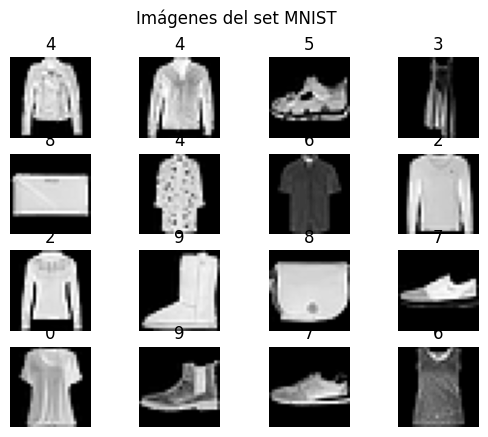

In [3]:
ids_imgs = np.random.randint(0,X_train.shape[0],16)
for i in range(len(ids_imgs)):
	img = X_train[ids_imgs[i],:,:]
	plt.subplot(4,4,i+1)
	plt.imshow(img, cmap='gray')
	plt.axis('off')
	plt.title(y_train[ids_imgs[i]])
plt.suptitle('Imágenes del set MNIST')
plt.show()

In [4]:

X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Aplanar las imágenes de 28x28 a un vector de 784 elementos
    tf.keras.layers.Dense(128, activation='relu'),  # Primera capa oculta con 128 neuronas
    tf.keras.layers.Dense(128, activation='relu'),  # Segunda capa oculta con 128 neuronas
    tf.keras.layers.Dense(10, activation='softmax')  # Capa de salida para las 10 clases
])


c:\Users\jufeg\Documents\VSC_codes\env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #adecuada para clasificación multiclase con etiquetas enteras
              metrics=['accuracy'])

In [ ]:

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7694 - loss: 0.6533 - val_accuracy: 0.8495 - val_loss: 0.4013
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8609 - loss: 0.3807 - val_accuracy: 0.8659 - val_loss: 0.3690
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8759 - loss: 0.3376 - val_accuracy: 0.8734 - val_loss: 0.3442
Epoch 4/10
1188/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8848 - loss: 0.3111

In [19]:

val_loss, val_accuracy = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de validación: {val_accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8777 - loss: 0.3537
Precisión en el conjunto de validación: 0.88


In [20]:

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)


print(f"Precisión en el conjunto de prueba: {accuracy_score(y_test, y_pred_classes):.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Precisión en el conjunto de prueba: 0.88
